In [105]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
#The Following is Apoorva Nori's Code

In [26]:
df_draft = pd.read_csv('NBA-Drafts.csv')
df_allstar = pd.read_csv('NBA-All-Star-Games.csv')

In [3]:
#NBA Drafts

In [3]:
from sqlalchemy import create_engine, sql

conn_string = 'mysql://{user}:{password}@{host}:{port}/?charset=utf8'.format(
    user='root', password='dwdstudent2015', 
    host = 'localhost', port=3306, encoding='utf-8')
engine = create_engine(conn_string)

In [ ]:
# engine.dispose()

In [12]:
engine.execute('CREATE DATABASE IF NOT EXISTS NBA')
engine.execute('USE NBA')

In [13]:
# Store the dataframe as a SQL table, using the to_sql command
df_draft.to_sql(name='drafts', if_exists='replace', index=False, con=engine, chunksize=1000)

In [14]:
df_allstar.to_sql(name='allstars', if_exists='replace', index=False, con=engine, chunksize=1000)

In [93]:
df3 = pd.read_sql("SELECT * FROM drafts LIMIT 100", con=engine)
df3.head(5)

Draft Year  Round  Pick Team          Player                     College  \
0      2016.0    1.0   1.0  PHI     Ben Simmons  Louisiana State University   
1      2016.0    1.0   2.0  LAL  Brandon Ingram             Duke University   
2      2016.0    1.0   3.0  BOS    Jaylen Brown    University of California   
3      2016.0    1.0   4.0  PHO   Dragan Bender                        None   
4      2016.0    1.0   5.0  MIN       Kris Dunn          Providence College   

   Yrs     G      MP    PTS           ...              3P%    FT%  \
0  NaN   NaN     NaN    NaN           ...              NaN    NaN   
1  1.0  42.0  1157.0  335.0           ...            0.278  0.691   
2  1.0  38.0   497.0  180.0           ...            0.325  0.641   
3  1.0  31.0   382.0   97.0           ...            0.317  0.167   
4  1.0  38.0   643.0  150.0           ...            0.294  0.619   

   Minuts Played  Points  Total Rebounds  Assists  Win Share  Win SharesS/48  \
0            NaN     NaN             NaN      NaN        NaN             NaN   
1           27.5     8.0             4.1      2.0       -0.2          -0.006   
2           13.1     4.7             1.9      0.6        0.3           0.029   
3           12.3     3.1             2.0      0.4       -0.1          -0.008   
4           16.9     3.9             2.2      2.5        0.2           0.012   

   Box Plus/Minus  Value Over Replacement  
0             NaN                     NaN  
1            -4.3                    -0.7  
2            -4.8                    -0.3  
3            -3.8                    -0.2  
4            -2.5                    -0.1  

[5 rows x 23 columns]

In [76]:
df_stars = pd.read_sql("SELECT * FROM allstars", con=engine)
df_stars.head()

len(set(df_stars.Player))

123

In [100]:
#Query needs to independently get counts of total players per college and the num of allstars per college
#Then we calculate a proportion of the number of stars to the total number of players 
#Ranked by total number of players to show our confidence in each ratio 

query = 'SELECT PlayerCounts.PlayerCollege, StarCounts.Num_Stars, PlayerCounts.Num_Players, \
                (StarCounts.Num_Stars / PlayerCounts.Num_Players) AS Ratio \
         FROM \
            (SELECT COUNT(DISTINCT drafts.Player) AS Num_Players, drafts.College AS PlayerCollege\
             FROM drafts \
             GROUP BY drafts.College) AS PlayerCounts \
         INNER JOIN \
            (SELECT COUNT(DISTINCT drafts.Player) AS Num_Stars, drafts.College AS StarCollege \
             FROM drafts \
             INNER JOIN allstars \
             ON drafts.Player = allstars.Player \
             GROUP BY drafts.College) AS StarCounts \
         ON PlayerCounts.PlayerCollege  = StarCounts.StarCollege \
         ORDER BY Num_Players DESC'
         

df_join = pd.read_sql(query, con = engine)


In [138]:
df_join.head()

PlayerCollege  Num_Stars  Num_Players   Ratio
0                 University of Kentucky          7           43  0.1628
1                        Duke University          5           42  0.1190
2                  University of Arizona          2           37  0.0541
3  University of California, Los Angeles          4           36  0.1111
4           University of North Carolina          4           36  0.1111

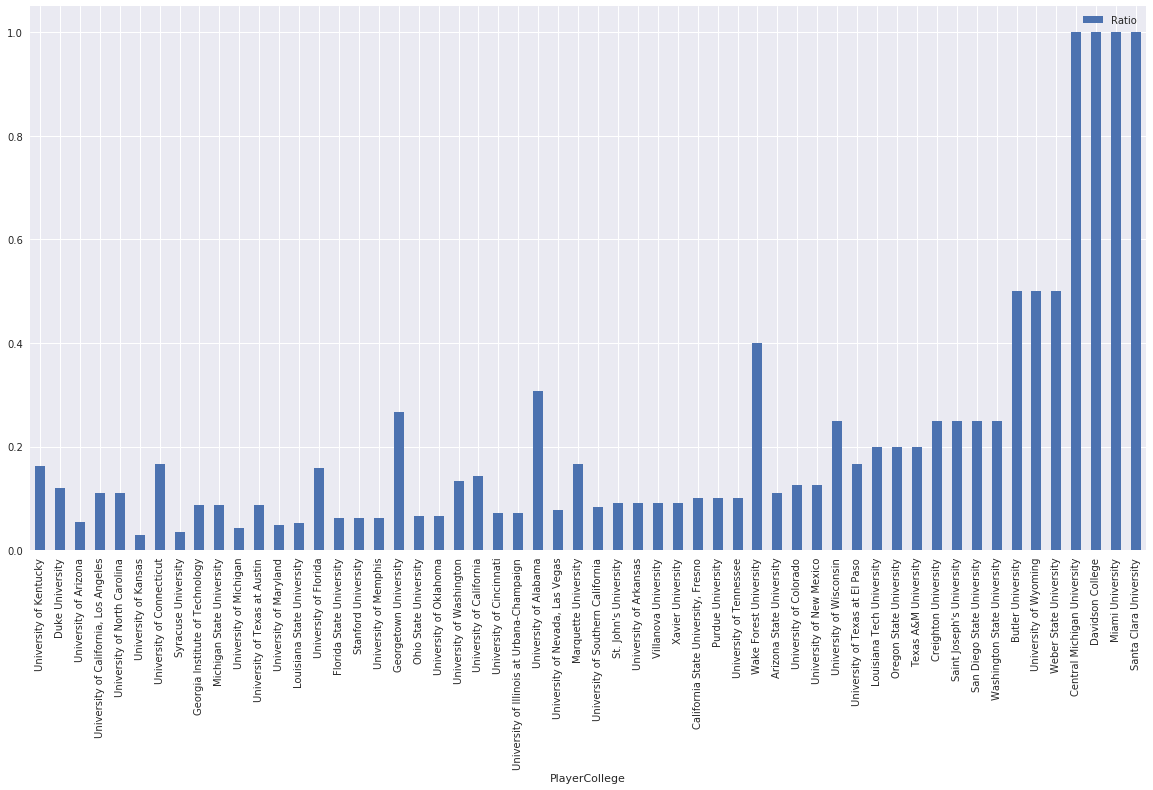

In [101]:
#Quick pandas based visualization 

plt.figure(figsize=(30,10))

df_join[["Ratio", "PlayerCollege"]].plot(kind = 'bar', x = 'PlayerCollege', figsize = (20,10))

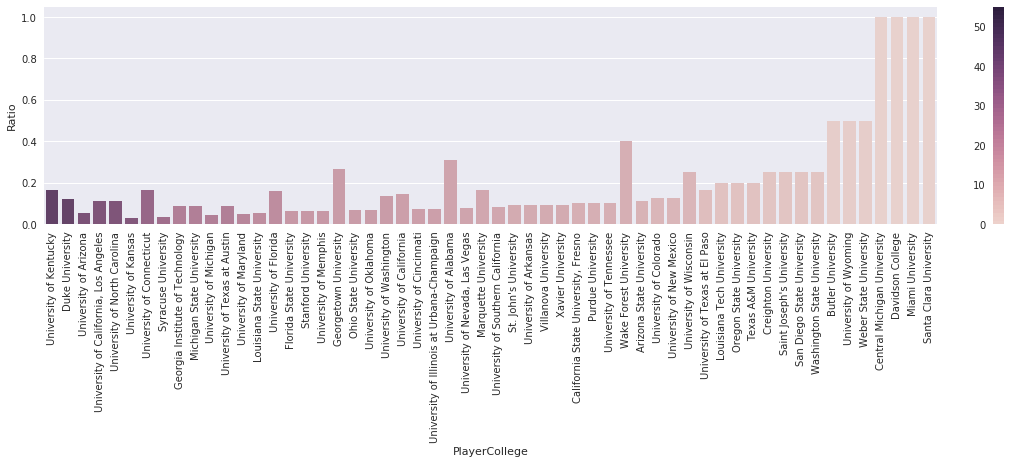

In [137]:
#Code leverages this StackOverflow question: 
# https://stackoverflow.com/questions/40384925/colorbar-for-barplot-when-bar-colors-are-selected-by-ranks


index = list(range(len(df_join["PlayerCollege"])))   #Need as numerics to create the palette
count = df_join["Ratio"]
rank  = df_join["Num_Players"]


pal = sns.cubehelix_palette(len(index)) 
cmp = mpl.colors.LinearSegmentedColormap.from_list('my_list', pal, N=len(index))


plt.figure(figsize = (20,4))   #In inches -- set big enough to be readable!

plot = plt.scatter(index, count, c=range(len(index)), cmap=cmp)  
plt.clf()
plt.colorbar(plot)
sns.barplot(x=df_join["PlayerCollege"], y=count, palette=np.array(pal)[rank])
ax = plt.gca()

#Rotate x axis labels to get them to look nice
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

sns.despine()

In [ ]:
#The following is Jessica Chen and Yifu Yu's Code

In [ ]:
firstquery = '''
SELECT D.Player, D.MP AS Min_Played, D.G AS Games_Played, COUNT(*) AS num_app
FROM drafts D
INNER JOIN allstars A ON D.Player = A.Player
GROUP BY D.Player, D.MP, D.G
ORDER BY num_app DESC;
'''

In [ ]:
firstreading[
    (firstreading.Min_Played > 10000) &
    (firstreading.num_app > 1)].plot(kind = 'scatter',
    x = 'Min_Played',
    y = 'num_app',
    alpha = 1, # alpha parameter changes the transparency of the data points
    figsize = (10,10) # this changes the size of the plot
      )

In [ ]:
#The following is Claire Liu's Code

In [ ]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "%matplotlib inline\n",
    "\n",
    "import pandas as pd\n",
    "import numpy as np\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "sns.set(color_codes=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "df_draft = pd.read_csv('NBA-Drafts.csv')\n",
    "df_allstar = pd.read_csv('NBA-All-Star-Games.csv')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "#NBA Drafts"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "from sqlalchemy import create_engine, sql\n",
    "\n",
    "conn_string = 'mysql://{user}:{password}@{host}:{port}/?charset=utf8'.format(\n",
    "    user='root', password='dwdstudent2015', \n",
    "    host = 'localhost', port=3306, encoding='utf-8')\n",
    "engine = create_engine(conn_string)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "# engine.dispose()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "engine.execute('CREATE DATABASE IF NOT EXISTS NBA')\n",
    "engine.execute('USE NBA')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "scrolled": true
   },
   "outputs": [],
   "source": [
    "# Store the dataframe as a SQL table, using the to_sql command\n",
    "df_draft.to_sql(name='drafts', if_exists='replace', index=False, con=engine, chunksize=1000)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "df_allstar.to_sql(name='allstars', if_exists='replace', index=False, con=engine, chunksize=1000)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "#query one: evaluate the average performance of allstars by position\n",
    "#using indicators of pts:total points a play get, TRB:total rebond, AST:assist, Winshare and BPM, which is a metric to \n",
    "#evalue contribution of each player\n",
    "#our position of interest is C-center, SG-shooting guard, F-forwrd\n",
    "query = '''\n",
    "select  A.Pos,round(avg(D.PTS),2) as avg_total_points, round(avg(D.TRB),2) as avg_total_rebound,\n",
    "        round(avg(D.AST),2) as avg_assist_turnover, \n",
    "        round(avg(D.`Box Plus/Minus`),2 ) AS avg_BPM,\n",
    "        ROUND(avg(`Win Share`)) as avg_win_share\n",
    "from allstars A inner join drafts D on A.Player=D.Player\n",
    "where A.Pos='F' or A.Pos='SG' or A.Pos='C'\n",
    "group by A.Pos\n",
    "'''\n",
    "df_stat = pd.read_sql(query, con=engine)\n",
    "\n",
    " # F - Forward, SG: scoring guard, C-center"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "df_stat #we show the result of our query"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "dfp=df_stat.pivot_table(index='Pos') # make position to be the index"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "scrolled": true
   },
   "outputs": [],
   "source": [
    "dfp"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "dfp.plot()   #plot the specialization of each position, \n",
    "            #Eg: Chance of getting points: (SG>F>C) Chance of assist: (SG>F>C),Chance of having rebounds: (C>F>SG)\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "query2 = '''\n",
    "select Player, PTS as total_points, TRB as total_rebound, AST as assist_turnover,  `Win Share` as win_share, `Box Plus/Minus` AS BPM\n",
    "from drafts \n",
    "where Player= 'Lebron James'\n",
    "'''\n",
    "df_stat2 = pd.read_sql(query2, con=engine)\n",
    "df_stat3=df_stat2.pivot_table(index='Player')\n",
    "df_stat3    #we find the indicators for Lebron James, to give an example of how he excel the average "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.5.2"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}